In [ ]:
%matplotlib inline


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
patients = pd.read_csv('patients_dataset.csv')


In [ ]:
patients.dropna()
pt =patients.iloc[:349,:]
test = patients.iloc[349:,:]

In [ ]:
#patients.dropna()
#pt = patients.sample(frac=0.7)
#test = patients.drop(training_data.index)

In [ ]:
#mask = np.random.rand(len(patients)) <= 0.7
#pt = patients[mask]

#test = patients[~mask]


In [ ]:
#patients = pt.values
#Y = patients[0 : 350, -2].reshape(350, 1)
#X = patients[0:350, :-1]

In [ ]:
#patients_test = test.values
#Y_test = test[0 : 150, -2].reshape(150, 1)
#X_test = test[0:150, :-1]

In [ ]:
X = pt[['AGE','FEMALE', 'LOS', 'APRDRG', ]]

Y = pt[['TOTCHG']]

In [ ]:
X_test = test[[ 'AGE', 'FEMALE', 'LOS', 'APRDRG',]]

Y_test = test[['TOTCHG']]

In [ ]:
print(X.shape)
print(Y.shape)

(349, 4)
(349, 1)


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(151, 4)
(151, 1)


In [ ]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T


In [ ]:
def regression(X, Y, learn_rate, iteration):
  S = Y.size
  theta = np.zeros((X.shape[1], 1))

  J_list = []
  for i in range(iteration):


    y_pred = np.dot(X, theta)

    J = (1/(2*S))*np.sum(np.square(y_pred - Y))


    d_theta = (1/S)*np.dot(X.T, y_pred - Y)

    theta = theta-learn_rate*d_theta


    J_list.append(J)
    # to print the cost for 10 times
    if(i%(iteration/10) == 0):
      print("Cost is :", int(J))
      y_pred = np.dot(X_test, theta)
      error = 1/X_test.shape[0]*np.sqrt(np.sum(np.square(np.abs(y_pred - Y_test))))
      #error = (1/X_test.shape[0])*np.sum(np.abs(y_pred-Y_test))
      print('error is', error)

  return theta, J_list

In [ ]:
iteration = 10000
learn_rate = 0.0000005
theta, J_list = regression(X, Y, learn_rate = learn_rate, iteration =
iteration)

Cost is : 13880452
error is TOTCHG    249.080366
dtype: float64
Cost is : 11029432
error is TOTCHG    204.38293
dtype: float64
Cost is : 10938433
error is TOTCHG    203.16918
dtype: float64
Cost is : 10849407
error is TOTCHG    201.982217
dtype: float64
Cost is : 10762292
error is TOTCHG    200.821164
dtype: float64
Cost is : 10677027
error is TOTCHG    199.68518
dtype: float64
Cost is : 10593555
error is TOTCHG    198.573456
dtype: float64
Cost is : 10511820
error is TOTCHG    197.485213
dtype: float64
Cost is : 10431770
error is TOTCHG    196.419705
dtype: float64
Cost is : 10353353
error is TOTCHG    195.376212
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

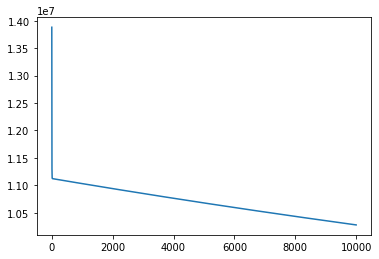

In [ ]:
rng = np.arange(0, iteration)
plt.plot(rng, J_list)
plt.show()